# **My First Ml project**

## **Load Data**

In [13]:
import pandas as pd

In [15]:
df=pd.read_csv('/Users/rayquaza/Desktop/mlops/sklearn/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **Data Preparation**

### Data Separation as X and Y

In [24]:
y=df.logS
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [30]:
x=df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data Splitting

In [35]:
from sklearn.model_selection import train_test_split as tts

In [37]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=100)

In [41]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# **Model Building**

# **Training the Model**

## **Linear Regression**

In [57]:
from sklearn.linear_model import LinearRegression

In [62]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

## **Applying Model for prediction**

In [69]:
#name_model_train/test_prediction=this is the naming convention
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

## **Evaluate Model Performance**

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [100]:
results=pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
results.columns=columns=['Model','Training MSE','Tranning r2','Testing MSE','Testing r2']

In [102]:
results

,Model,Training MSE,Tranning r2,Testing MSE,Testing r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

In [126]:
from sklearn.ensemble import RandomForestRegressor as rfg

## **Traning the Model**

In [128]:
rf =rfg(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

## **Applying the model to make prediction**

In [133]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

## **Evaluate the model performance**

In [136]:
from sklearn.metrics import mean_squared_error, r2_score

In [142]:
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)

In [149]:
results_rf=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
results_rf.columns=columns=['Model','Training MSE','Tranning r2','Testing MSE','Testing r2']

In [151]:
results_rf

,Model,Training MSE,Tranning r2,Testing MSE,Testing r2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Model Comparison**

In [161]:
model=pd.concat([results,results_rf])
model.index=[0,1]

In [163]:
model

,Model,Training MSE,Tranning r2,Testing MSE,Testing r2
0,Random Forest,1.028228,0.759669,1.407688,0.709223
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# **Data Visualization of prediction**

In [182]:
import matplotlib.pyplot as plt
import numpy as np

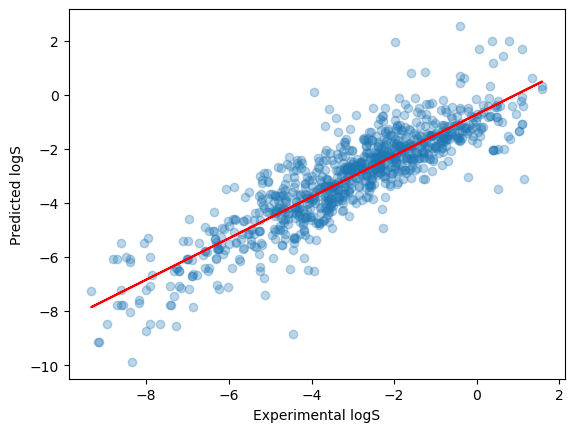

In [194]:
plt.scatter(x=y_train, y=y_lr_train_pred,alpha=0.3)
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')
z=np.polyfit(y_train,y_lr_train_pred,1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),'Red')